# 서울시 구별 CCTV 현황 분석하기

- 26개 각 구별 cctv 대수 파악
- 인구대비 cctv비율 파악

1. 라이브러리 호출
2. 데이터 불러오기
3. 데이터 파악
    1. CCTV 데이터 파악
    2. 서울시 인구 데이터 파악
4. CCTV와 서울시 인구 합치고 분석
5. 변수별 상관관계
6. 시각화

- cctv_seoul # 서울시 cctv 데이터셋


## 1.라이브러리

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns 

# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

## 2.데이터 불러오기

In [123]:
cctv_seoul_ori = pd.read_csv("~~\\01. CCTV_in_Seoul.csv"
                             ,encoding='utf-8')
cctv_seoul = cctv_seoul_ori.copy()
cctv_seoul.shape # 25,6
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [124]:
population_seoul_ori = pd.read_excel("~~\\01. population_in_Seoul.xls"
                               , encoding='utf-8'
                               , header=2 ) # n행의 데이터가 열 이름이 된다. default = 0
population_seoul = population_seoul_ori
population_seoul.shape # 29,14
population_seoul.head(3)

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0


## 3.cctv 데이터 파악

In [125]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [126]:
population_seoul.columns

Index(['기간', '자치구', '세대', '계', '남자', '여자', '계.1', '남자.1', '여자.1', '계.2',
       '남자.2', '여자.2', '세대당인구', '65세이상고령자'],
      dtype='object')

    - column명 변경

In [127]:
population_seoul_sub = population_seoul.loc[:,['자치구','계','계.1','계.2','65세이상고령자']]
population_seoul_sub.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [128]:
population_seoul_sub.rename(columns={
                                population_seoul_sub.columns[0] : '구별'
                                ,population_seoul_sub.columns[1] : '인구수'
                                ,population_seoul_sub.columns[2] : '한국인'
                                ,population_seoul_sub.columns[3] : '외국인'
                                ,population_seoul_sub.columns[4] : '고령자'}
                           ,inplace = True)
population_seoul_sub.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


## 3-1.CCTV데이터 파악

In [129]:
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [130]:
# cctv 많은 구 5곳. 강남구, 양천구, 서초구, 은평구, 용산구
cctv_seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [131]:
# cctv 적은 구 5곳. 도봉구, 마포구, 송파구, 중랑구, 중구
cctv_seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [132]:
# 최근 3년간 증가율 = (2016+2015+2014) / 2013년도 이전 * 100
# 종로구, 도봉구, 마포구, 노원구, 강동구
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년']+cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 3-2. 서울시 인구 데이터 파악

In [133]:
population_seoul_sub.head(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [134]:
population_seoul_sub.drop([0], inplace=True) # 0행 삭제
population_seoul_sub.head(3)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0


In [135]:
# 누락값 유무
population_seoul_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
구별     25 non-null object
인구수    25 non-null float64
한국인    25 non-null float64
외국인    25 non-null float64
고령자    25 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [136]:
# 26번째 행 nan -> 삭제
population_seoul_sub[population_seoul_sub['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [137]:
population_seoul_sub.drop([26], inplace=True)
population_seoul_sub

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [138]:
population_seoul_sub['외국인비율'] = population_seoul_sub['외국인'] / population_seoul_sub['인구수'] * 100
population_seoul_sub['고령자비율'] = population_seoul_sub['고령자'] / population_seoul_sub['인구수'] * 100
population_seoul_sub.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [139]:
# 인구수 많은 5구. 송파구, 강서구, 강남구, 노원구, 관악구
population_seoul_sub.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [140]:
# 외국인 많은 5구. 영등포구, 구로구, 금천구, 관악구, 동대문구
population_seoul_sub.sort_values(by='외국인',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [141]:
# 외국인비율 높은 5구. 영등포구, 금천구, 구로구, 중구, 용산구
population_seoul_sub.sort_values(by='외국인비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [142]:
# 고령자 많은 5구. 강서구, 송파구, 은평구, 노원구, 관악구
population_seoul_sub.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [143]:
# 고령자비율 높은 5구. 강북구, 종로구, 중구, 용산구, 서대문구
population_seoul_sub.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 4.cctv 데이터와 인구 데이터 합치고 분석하기

In [144]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [145]:
data_result = pd.merge(cctv_seoul, population_seoul_sub, on='구별')
data_result.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [146]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


    - index변경

In [147]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 5.변수별 상관관계 보기

    - 피어슨 상관계수 : numpy.corrcoef()

In [148]:
# cctv 개수와 고령자 비율은 약한 음의 상관관계ㅍ
np.corrcoef(data_result['소계'],data_result['고령자비율'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [149]:
# cctv 개수와 외국인 비율은 큰 의미가 없음
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [150]:
# cctv 개수와 인구수는 약한 양의 상관관계
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [151]:
# 음.. 돈많은 구가 cctv도 많음
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [152]:
# 인구수많다고 cctv많은게 아님
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 6.그래프그리기

In [162]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


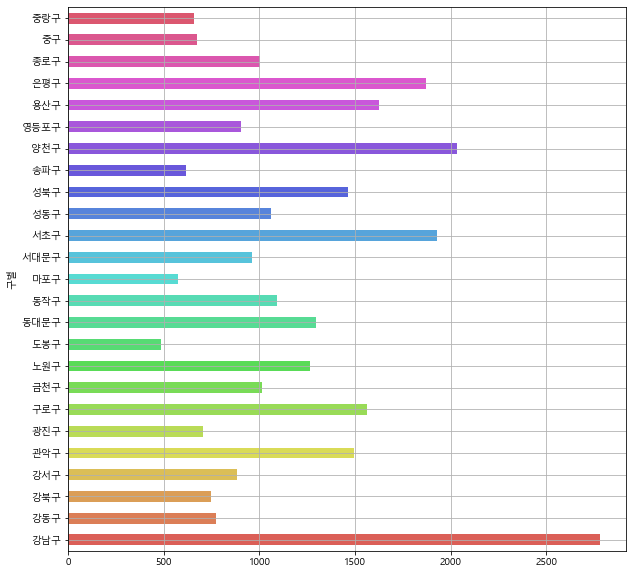

In [169]:
colors = sns.color_palette('hls',len(data_result))

plt.figure(figsize=(10,6))
data_result['소계'].plot(kind='barh' # h붙이면 90도 누워서 출력
                       , color=colors 
                       , grid=True #격자
                       , figsize=(10,10)) 
plt.show()

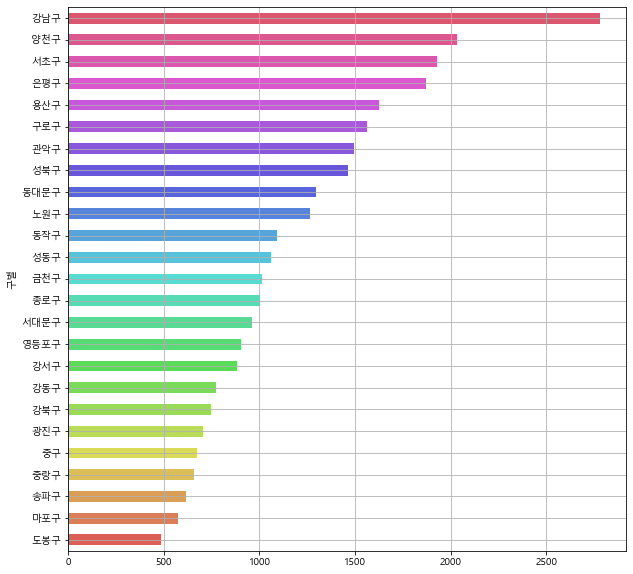

In [172]:
colors = sns.color_palette('hls',len(data_result))

plt.figure(figsize=(10,6))
data_result['소계'].sort_values().plot(kind='barh' # h붙이면 90도 누워서 출력
                                       , color=colors 
                                       , grid=True #격자
                                       , figsize=(10,10)) 
plt.show()

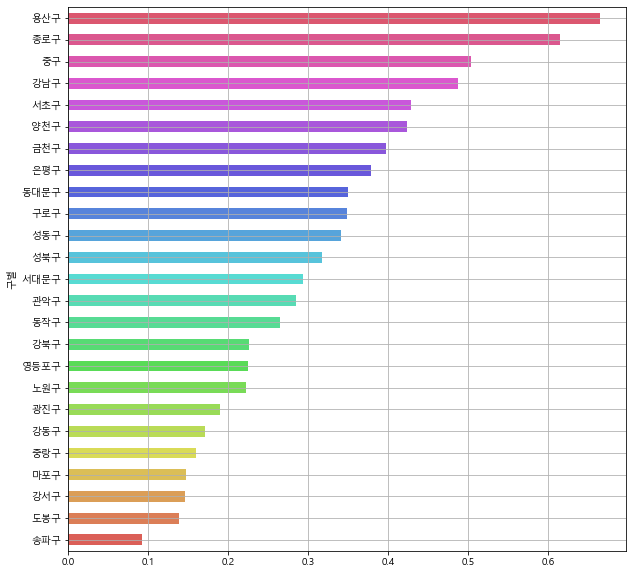

In [182]:
# 인구수 대비 cctv 비율이 높은곳
# colors = sns.color_palette('Paired',len(data_result.index))
colors = sns.color_palette('hls',len(data_result))
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh'
                                        ,grid=True
                                        ,color=colors
                                        ,figsize=(10,10))
plt.show()

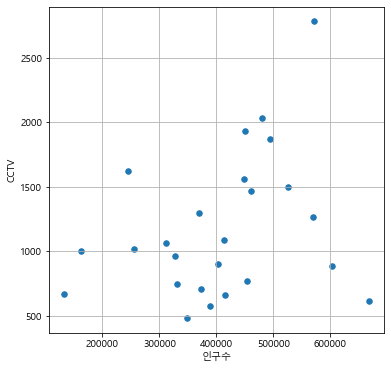

In [180]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계']
            , s=30 # s:크기
           ) 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

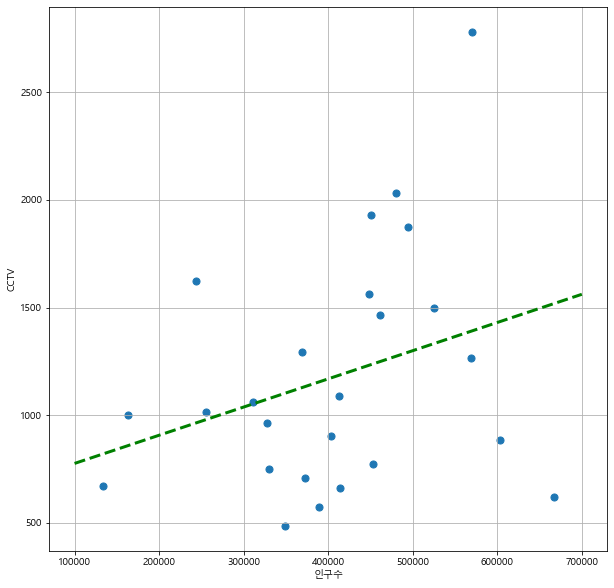

In [196]:
# y = ax + b (a=기울기, b=절편)
# 기울기, 절편, 1차원
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# polynomial
f1 = np.poly1d(fp1) # 1매개변수로 모델 생성
fx = np.linspace(100000, 700000, 100) # 시작, 끝(포함), 변수

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # lw 선의 굵기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [204]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
 # fp1 # array([1.30916415e-03, 6.45066497e+02])
f1 = np.poly1d(fp1)
 #print(f1) # 0.001309 x + 645.1
fx = np.linspace(100000,700000,100) # 시작, 끝(포함), 변수
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
f1(data_result['인구수'])

array([1391.94464487, 1238.42289235, 1077.34202601, 1435.50315451,
       1333.05189553, 1132.29026377, 1231.40708166,  979.01070661,
       1390.48361768, 1101.50134126, 1128.79741381, 1185.12289226,
       1155.18099895, 1073.3765678 , 1234.59620553, 1052.53598367,
       1248.93155299, 1518.91131175, 1273.43648757, 1172.64001207,
        964.76830981, 1292.30154299,  858.22460369,  819.4995281 ,
       1187.71896477])

In [225]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


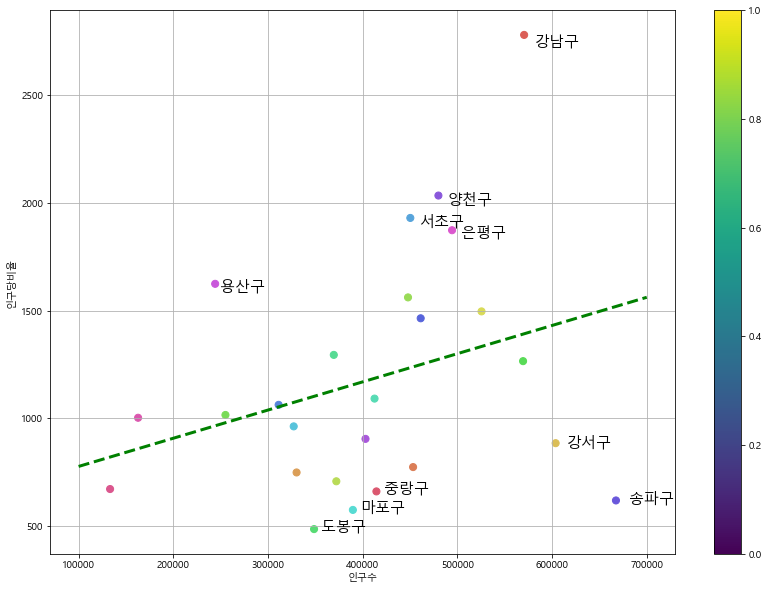

In [226]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계']
            ,s=50 # 굵기
            ,c=sns.color_palette('hls',len(data_result['오차'])) #색상
           )
plt.plot(fx, f1(fx), linestyle='dashed', linewidth=3, color='g')
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,  # 해당좌표에 구 이름출력
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다